# Part 1 - Exploration of Propsper Loan data

## by ...

## Introduction

>...

>...

>...

## Preliminary Wrangling

In [1]:
# import main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
# read in the dataset
df = pd.read_csv("C:/Users\Michael Smales/OneDrive/Documents/Work and study/Ongoing courses and learning/2022/Udacity - Data Analyst/project_5/source data/prosperLoanData.csv")

In [3]:
df.iloc[0:5, 80:90]

Investors
0        258
1          1
2         41
3        158
4         20

In [4]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [5]:
df.shape

(113937, 81)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
# print the full list of columns
print(list(df.columns))

['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'Deb

### What is the dataset structure?

* Propsper is a peer-to-peer lending service where borrowers advertize for a loan by creating a listing (TBD). Investors can then choose loans to fund based on the borrower profile, loan request etc. 
* The dataset contains over 100k loan listings
* Each listing has a primary listing key, and contains foreign keys for the associated member (borrower) and the loan ID
* The data has 81 columns representing data for each listing including
  - basic information about the listing (create dates etc)
  - information about the loan including amount, term, status, rate, what the loan is to be used for
  - various risk scores 
  - borrower information such as occupation, state of residence, homeowner status, income range, 
  - information from a credit report pull, including credit score
  - information on the member's (borrower's) prior loans through Prosper 
  - information on payments on the loan associated with the listing
  - number of lenders already invested in the loan

### What are the main features of interest?

* I'm interested in exploring the makeup of the loans requested e.g.:
  - how large they?
  - what terms lengths do they have?
  - what rates do they have?
  - What are the purposes of the loans?
  - What proportion are funded and to what %
  - How long do they take to fund (i.e. time from listing to loan origination)



* Useful features for this:
  - ListingKey
  - ListingCreationDate
  - LoanOriginationDate
  - LoanOriginalAmount
  - MonthlyLoanPayment
  - PercentFunded
  - Term
  - BorrowerAPR
  - ProsperRating (Alpha)
  - ListingCategory

  
* I'm going to avoid asking questions about the members, because this would require a different view of the data i.e. a table of members and their associated listings

### What _other_ features will help with the investigation?

It could be interesting to then look at which loans get funded vs. those requested.  But first I need to investigate if the dataset is only for funded loans, or if all loans are funded.

So it could be useful to investigate briefly if the dataset is for requested or funded loans, and how we tell.
To explore that, the following fields are useful:
* LoanStatus
* ClosedDate
* LoanKey
* PercentFunded
* Investors

### What cleanup is needed before starting with the EDA?
* Create a subset of the dataframe with features of interest and over a set timeframe
* Rename columns to standard format i.e. lowercase with underscores
* Check for and remove duplicates
* Check for NaNs and either drop or fill them

**Question:** What is timeframe of dataset?

In [8]:
# check the timeframe of the dataset - listing creation date
df['ListingCreationDate'].min(), df['ListingCreationDate'].max()

('2005-11-09 20:44:28.847000000', '2014-03-10 12:20:53.760000000')

In [9]:
# check the timeframe of the dataset - loan origination date
df['LoanOriginationDate'].min(), df['LoanOriginationDate'].max()

('2005-11-15 00:00:00', '2014-03-12 00:00:00')

**Observation:** Dates Range from 2005 to 2014

Let's select 2012 as our year of interest (avoiding the period around the 2008 financial crisis)

### Cut dataset down to 2012, for the features of interest only

In [10]:
# reduce dataset to listings created in 2012 only
df_red = df[(df['LoanOriginationDate'] >= '2012-01-01') & (df['LoanOriginationDate'] < '2013-01-01')]

# confirm this worked
print(df.shape, df_red.shape)

# confirm this worked #2
print(df_red['LoanOriginationDate'].min(), df_red['LoanOriginationDate'].max())

(113937, 81) (19553, 81)
2012-01-03 00:00:00 2012-12-31 00:00:00


In [11]:
# reduce dataset to features of interest only
df_red = df_red.loc[:, ['ListingKey', 'ListingCreationDate', 'LoanOriginationDate', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'PercentFunded', 'Term', 'BorrowerAPR', 'ProsperRating (Alpha)', 'ListingCategory (numeric)']]

# confirm this worked
df_red.shape

(19553, 10)

In [12]:
df_red.head()

ListingKey            ListingCreationDate  \
3   0EF5356002482715299901A  2012-10-22 11:02:35.010000000   
10  0F123545674891886D9F106  2012-05-10 07:04:01.577000000   
15  0F483544120452347F48121  2012-04-10 09:14:46.297000000   
30  0F57353904771934596FE9F  2012-01-30 17:59:17.200000000   
31  0F683558129866945165D36  2012-09-21 13:37:43.210000000   

    LoanOriginationDate  LoanOriginalAmount  MonthlyLoanPayment  \
3   2012-11-01 00:00:00               10000              321.45   
10  2012-05-17 00:00:00               13500              395.37   
15  2012-04-19 00:00:00                4000              173.71   
30  2012-02-07 00:00:00               10000              322.62   
31  2012-09-27 00:00:00                2000               86.85   

    PercentFunded  Term  BorrowerAPR ProsperRating (Alpha)  \
3             1.0    36      0.12528                     A   
10            1.0    60      0.27462                     C   
15            1.0    36      0.35797                    HR   
30            1.0    36      0.12782                     A   
31            1.0    36      0.35797                    HR   

    ListingCategory (numeric)  
3                          16  
10                          1  
15                         13  
30                         20  
31                          2

### Clean column names

In [13]:
# clean column names
df_red.rename(columns=lambda x: x.strip().replace(" ", "_").replace("(", "").replace(")", ""), inplace=True)
df_red.rename(columns=lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower(), inplace=True)
df_red.rename(columns={'prosper_rating__alpha': 'prosper_rating_alpha'}, inplace=True)
df_red.columns

Index(['listing_key', 'listing_creation_date', 'loan_origination_date',
       'loan_original_amount', 'monthly_loan_payment', 'percent_funded',
       'term', 'borrower_a_p_r', 'prosper_rating_alpha',
       'listing_category_numeric'],
      dtype='object')

### Check for duplicates

In [14]:
# check for duplicates in the listing key
df_red['listing_key'].duplicated().sum()

0

### Check for NaN values

In [15]:
# check for total number of NaNs
df_red.isna().sum()

listing_key                 0
listing_creation_date       0
loan_origination_date       0
loan_original_amount        0
monthly_loan_payment        0
percent_funded              0
term                        0
borrower_a_p_r              0
prosper_rating_alpha        0
listing_category_numeric    0
dtype: int64

**Observation:** We have no NaNs, we can move on

### Create a column mapping the reason code numbers to descriptions

In [16]:
# Create a new column mapping the reason codes to reasons, using the data description file
reason_map = {
    0 : 'Not Available',
    1 : 'Debt Consolidation', 
    2 : 'Home Improvement', 
    3 : 'Business', 
    4 : 'Personal Loan', 
    5 : 'Student Use', 
    6 : 'Auto', 
    7 : 'Other', 
    8 : 'Baby & Adoption', 
    9 : 'Boat', 
    10 : 'Cosmetic Procedure', 
    11 : 'Engagement Ring', 
    12 : 'Green Loans', 
    13 : 'Household Expenses', 
    14 : 'Large Purchases', 
    15 : 'Medical/Dental', 
    16 : 'Motorcycle', 
    17 : 'RV', 
    18 : 'Taxes', 
    19 : 'Vacation', 
    20 : 'Wedding Loans'
}

# add column to dataframe
df_red['listing_category_alpha'] = df_red['listing_category_numeric'].map(reason_map)

## Univariate Exploration



### Loan amount

**Question:** What is the distribution of loan amounts?

In [17]:
# define histogram plotting function
def hist_plot(chart_data, xlabel=None, ylabel=None, title=None, bin_step=None, maj_tick_step=None, min_tick_step=None, xlim=None):

    if xlim == None:
        max_val = chart_data.max()
        min_val = chart_data.min()
    else:
        max_val = xlim[1]
        min_val = xlim[0]

    if bin_step==None:
        bin_step = (max_val) / 10
    
    if maj_tick_step == None:
        maj_tick_step = bin_step

    # set bin edge and tick locations
    bin_edges = np.arange(0, max_val+ 2 * bin_step, bin_step)
    maj_tick_locn = np.arange(0, max_val+ 2 * bin_step, maj_tick_step)
    if min_tick_step != None:
        min_tick_locn = np.arange(0, max_val+ 2 * bin_step, min_tick_step)

    # set tick labels
    tick_labels = []
    if max_val > 1000:
        for label in maj_tick_locn:
            tick_labels.append("{:.1f}k".format(label/1000))
    elif max_val > 1000000:
        for label in maj_tick_locn:
            tick_labels.append("{:.1f}m".format(label/1000000))
    else:
        for label in maj_tick_locn:
            tick_labels.append("{:.2f}".format(label))


    # create histoagram plot
    fig = plt.figure(figsize=[8,5]);
    ax = fig.add_axes([0.1, 0.1, 0.9, 0.9]);
    ax.hist(chart_data, bins=bin_edges);

    # set x-axis ticks and labels, offsetting to center of each bin
    ax.set_xticks(maj_tick_locn, labels=tick_labels);
    if min_tick_step != None: 
        ax.set_xticks(min_tick_locn, minor=True);

    # add labels etc
    sns.despine()
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);

    # set xlimit
    ax.set_xlim(xlim)


In [18]:
# plot loans originated in 2012
hist_plot(
    chart_data= df_red['loan_original_amount'],
    xlabel='Loan amount, $',
    ylabel='No. loans originated',
    title='Value of loans originated in 2012',
    bin_step = 1000,
    maj_tick_step = 5000,
    min_tick_step = 1000
)

**Observation:** 
* Loan values range from \\$2k to \\$25k
* The distribution is right-skeweed
* There are spikes at round numbers: \\$4k, \\$10k, \\$15k, \\$20k and \\$25k

In [19]:
# plot loans under $6k
hist_plot(
    chart_data= df_red['loan_original_amount'],
    xlabel='Loan amount, $',
    ylabel='No. loans originated',
    title='Value of loans under $6k originated in 2012',
    bin_step = 100,
    maj_tick_step = 500,
    min_tick_step = 100,
    xlim = (1500, 6000)
)

**Observations:**
* Looking at detail at the spike around \\$4k, these smaller loan amounts are generally distributed at \\$500 intervals, with the majority at \\$4,000

### Percent funded

**Question:** What % of the original loan amount is typically funded?

In [20]:
# check range of percent_funded
df_red['percent_funded'].min(), df_red['percent_funded'].max(),

(0.7009, 1.0125)

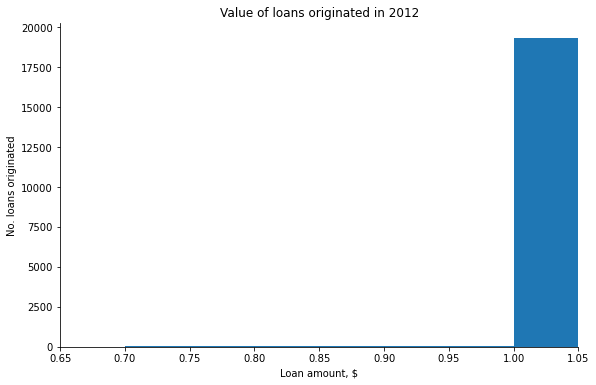

In [21]:
# plot loan funding as % of amount requested
hist_plot(
    chart_data= df_red['percent_funded'],
    xlabel='Loan amount, $',
    ylabel='No. loans originated',
    title='Value of loans originated in 2012',
    bin_step = 0.05,
    maj_tick_step = 0.05,
    xlim = (0.65, 1.05)
)
#TODO: maybe write on the %ages on top of the charts to make it clear that e.g. 99% are funded
#TODO: maybe make this a pie chart - it would get the message accross more clearly...

**Observation:**
* The vast majority of loans are ~100% funded

**Inferences:**
* That means that in this dataset all listings correspond to a loan.  It is not the case, for example, that 50% of the listings are not funded
* I'm assuming that loans are 100% funded because of the Prosper model; they must have some sort of dynamic adjustment of their interest rates until all loans are funded
* It may be interesting to check later what are the characteristics of those that are only 70-90% funded


### Loan terms (i.e. loan duration)

**Question:** What is the distribution of loan terms?

In [22]:
# check the term datatype and range of values: is it numerical or effectively categorical?
df_red['term'].value_counts()

36    12516
60     6255
12      782
Name: term, dtype: int64

**Observation**: Although this is a number of months, it is effectively a categorical ordinal variable

In [23]:
# define function for plotting a (vertical) column chart with relative y axis
def rel_col_chart(chart_data, xlabel=None, ylabel=None, title=None, plot_order=None):
    base_color = sns.color_palette()[0]
    plt.figure(figsize=[8,5])
    sns.countplot(x=chart_data, color=base_color, order=plot_order);

    # set up y axis which goes up to 100%
    y_ticks_max = chart_data.value_counts().max() / chart_data.count()
    if y_ticks_max > 0.5:
        y_tick_step = 0.1
    else:
        y_tick_step = 0.05
    y_tick_props = np.arange(0, y_ticks_max, y_tick_step) 
    y_tick_names = ['{:0.0f}%'.format(v * 100) for v in y_tick_props]

    # set x and y labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    ax = plt.gca()
    ax.set_yticks(y_tick_props * chart_data.count(), labels=y_tick_names)
    sns.despine();

In [24]:
# plot bar chart with relative y axis for loan terms
rel_col_chart(
    chart_data= df_red['term'], 
    xlabel='Loan term, months', 
    ylabel='No. of loans', 
    title='Loan terms'
)

**Observations:** 
* Loan terms range from 12 months to 60 months
* 36 month loans are by far the most popular, followed by 60 months.  12 month loans are not common

### Reasons people take loans

**Question:** What reasons do people take loans for?

In [25]:
# define function for plotting a (horizontal) bar chart with relative x axis
def rel_bar_chart(chart_data, xlabel=None, ylabel=None, title=None, plot_order=[]):
    base_color = sns.color_palette()[0]
    plt.figure(figsize=[8,5])

    # convert plot order to a list if needed
    if isinstance(plot_order, pd.Index):
        plot_order = list(plot_order.values)

    if plot_order == []:
        sns.countplot(y=chart_data, color=base_color);
    else:
        sns.countplot(y=chart_data, color=base_color, order=plot_order);

    # set up y axis which goes up to 100%
    x_ticks_max = chart_data.value_counts().max() / chart_data.count()
    if x_ticks_max > 0.5:
        x_tick_step = 0.1
    else:
        x_tick_step = 0.05
    x_tick_props = np.arange(0, x_ticks_max, x_tick_step) 
    x_tick_names = ['{:0.0f}%'.format(v * 100) for v in x_tick_props]

    # set x and y labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    ax = plt.gca()
    ax.set_xticks(x_tick_props * chart_data.count(), labels=x_tick_names)
    sns.despine();

    # Logic to print the proportion text on the bars
    counts = chart_data.value_counts()
    if plot_order == []:
        plot_order = df_red['listing_category_alpha'].unique()

    for i in range(len(plot_order)):
        count = counts.loc[plot_order[i]]
        # Convert count into a percentage, and then into string
        pct_string = '{:0.1f}%'.format(100 * count / chart_data.count())
        # Print the string value on the bar. 
        plt.text(count + counts.max()*0.01, i, pct_string, va='center')


In [26]:
# Create sort order for the bar chart
lc_order = df_red['listing_category_alpha'].value_counts().index
# Move 'Other' to the end - it is likely a mixture of miscellaneous categories 
lc_order = lc_order.drop('Other').union(['Other'], sort=False)
lc_order = lc_order.values.tolist()

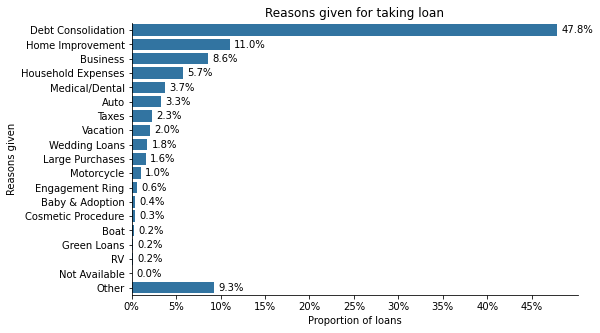

In [27]:
# create plot
rel_bar_chart(
    chart_data= df_red['listing_category_alpha'], 
    xlabel= 'Proportion of loans', 
    ylabel= 'Reasons given', 
    title= 'Reasons given for taking loan', 
    plot_order=lc_order
)

**Observations:**
* Debt consolidation is by far the largest reason for taking a loan at ~48% followed by home improvement, business, household expenses and other
* These top 5 categories make up 80% of Prospers 2012 loans, by number
* 5 categories are barely used: baby & adoption, cosmetic procedure, boat, green loans, RV 

### Rates on loans & risk ratings

**Question:** What rates do people pay on the loans?

In [28]:
# get info for setting up bin edges
df_red['borrower_a_p_r'].describe()

count    19553.000000
mean         0.253147
std          0.081855
min          0.065870
25%          0.186370
50%          0.257810
75%          0.335530
max          0.358400
Name: borrower_a_p_r, dtype: float64

**Observation:**
* The maximum rates paid on the loans of ~36% are high.  I checked and the rates are coroborated by an online review (linked below) which cites rates from 7.95% to 35.99%

In [29]:
# plot apr charged for loans originated 2012
hist_plot(
    chart_data= df_red['borrower_a_p_r'],
    xlabel='APR charged',
    ylabel='No. loans',
    title='APR charged to borrowers for loans originated in 2012',
    bin_step = 0.03,
    maj_tick_step = 0.03,
    min_tick_step = 0.01
)


**Observation:**
* APRs charged range from 6% to 36%
* The distribution of rates is left-skewed with a big spike in the 34%-36% bucket

**Inferences:**
* Although rates are in the range of 6-36%, there is clearly a bias towards customers being charged higher rates
* There are many possible explanations for this.  For example, Prosper may actively push customers to the higher end of their advertised rates to boost profits.  Alternatively, they may find that their customers tend to skew towards higher risk ratings, so only qualify for higher rates  

**Question:** What is the distribution of risk ratings for the Prosper loans?

In [53]:
# set the risk rating order
rr_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

In [54]:
# plot relative bar chart for loan risk rating counts
rel_col_chart(
    chart_data= df_red['prosper_rating_alpha'], 
    xlabel='Loan risk rating, using Prosper rating system', 
    ylabel='No. loans', 
    title='Distribution of loan risk ratings',
    plot_order = rr_order
)

**Observation:**
* The risk ratings are relatively evenly distributed, with a peak in the centre of the distribution, and in the high risk ('HR') category
* Surpsingly, this does _not_ match the level of skew seen in the borrower APRs. This implies that loans in the better risk bands are still attracting the lowest rate 

### Summary of univariate exploration
* Loan values range from $2-25k, are right-skewed, and have spikes at multiples of $5k
* Below $5k, loan values tend to cluster around multiples of $500
* Almost all loans in the dataset are fully-funded
* The most common loan duration is 36 months, followed by 60 months.  12 months is less common
* The reason for almost 50% of loans is debt consolidation.  AFter that household expenses, business and home improvements and other each get around 10% (by number of loans)
* Borrower APR ranges from 6% to 36%.  There is right skew, with a major peak at 36% APR loans
* Interstingly the risk rating is not as severly right-skewed.  It is bimodal, with peaks at 'C' (the middle of the range) and at 'HR', the high-risk loans


### Major questions I'd like to explore in the bivariate exploration
* Are there noticable differences in the top 5 listing reason groups?  Do they pay more etc?
* What is going on with the cluster of loans with APR of 36%?
* Are there any relationships explaining loan size.  We see the skew favouring loans below $5k.  Is there anything to explain that?

## Bivariate exploration

### Loan volume during the year

**Quesiton:** When were loans created during the year?

In [31]:
# line plot / bar chart showing volume of loans created during the year

### Exploration of APR 

**Question:** I'd like to try to understand what drives APR e.g.:
  - Loan size
  - Loan risk rating
  - Term

**Question:** What is the relationship between loan amount and APR?

In [55]:
# scatter plot of APR and loan size
plt.figure(figsize=[9,7])
plt.scatter(x=df_red['loan_original_amount'], y=df_red['borrower_a_p_r'], alpha=0.1);
# sns.regplot(x=df_red['loan_original_amount'], y=df_red['borrower_a_p_r']);
plt.xlabel('Loan value, $');
plt.ylabel('Borrower APR');

**Obervation:** 
* There seems to be a wide range of combinations of loan size and APR
* You an see track marks at the common loan sizes at $5k multiples
* There is a cluster of low-value high-rate loans in the top-left
* It appears that there are limits on loan values - you can see steps on the top right where the APR hits a ceiling where e.g. loans over $15k never have an APR of over 27%

=> Let's check this as a scatter plot to see if the picture is clearer

In [33]:
plt.hist2d(data = df_red, x = 'loan_original_amount', y = 'borrower_a_p_r', cmap='BuGn');
plt.colorbar();

#TODO: plot this as 3 side-by-side subplots and clean up a little

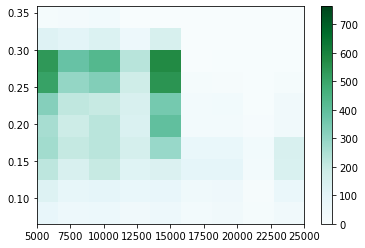

In [34]:
# Plot only loans over $5k, to improve detail for the rest of the plot
plt.hist2d(data = df_red, x = 'loan_original_amount', y = 'borrower_a_p_r', cmap='BuGn', cmax=4000);
plt.colorbar();
plt.xlim((5000, 25000));

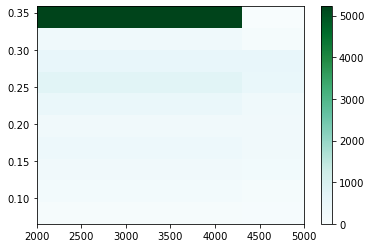

In [35]:
# Plot again for the loans under $5k
plt.hist2d(data = df_red, x = 'loan_original_amount', y = 'borrower_a_p_r', cmap='BuGn');
plt.colorbar();
plt.xlim((2000, 5000));

In [36]:
# try plotting histograms for loans above and below $5k
df_under_5 = df_red[df_red['loan_original_amount'] <=5000]
df_over_5 = df_red[df_red['loan_original_amount'] >5000]

#confirm this worked
df_under_5.shape, df_over_5.shape


((9873, 11), (9680, 11))

**Observations:**
* It is clear that there is a high concentration of loans in the ~36% APR and <$4k range
* When we take things out, there is a more even distribution of loans, typically from $5-15k, with rates from 15%-30%  

=> Let's check if there seems to be a limit on loan value as risk rating goes up

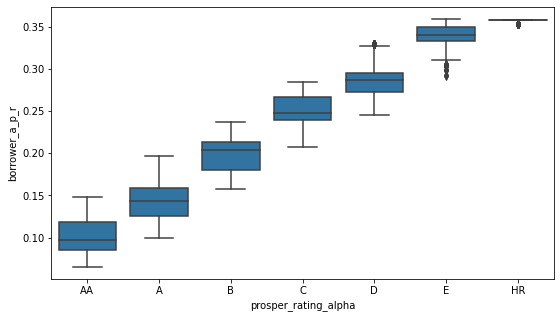

In [56]:
# violin plot / faceted histogram plot of APR distribution for different risk ratings
base_color = sns.color_palette()[0]

plt.figure(figsize=[9,5])
sns.boxplot(data=df_red, x='prosper_rating_alpha', y='borrower_a_p_r', color=base_color, order=rr_order);


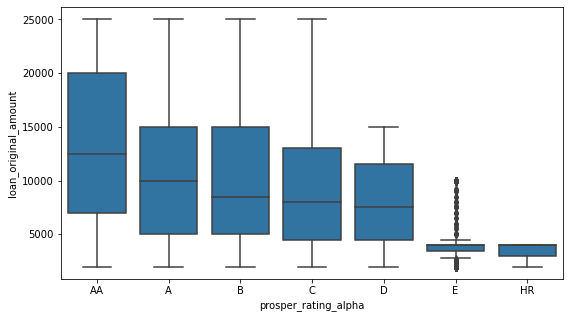

In [57]:
# It looks like loan size is capped at certain APRS (there are no 20k loans with rates over about 24%).  Maybe there are caps on loan size by risk rating?
# violin plot / faceted histogram plot of APR distribution for different risk ratings
base_color = sns.color_palette()[0]

plt.figure(figsize=[9,5])
sns.boxplot(data=df_red, x='prosper_rating_alpha', y='loan_original_amount', color=base_color, order=rr_order);

**Observations:** 
* There are clearly links between the risk rating and both rate and loan amount
* As risk rating worsens, APR increases, with almost all of the high-risk ('HR') loans attracting a rate of ~36%
* Conversely, as risk rating worsens loan amounts decrease.  At a rating of D the limit appears to  be $15k, and at HR the limit appears to be $4k or $5k

**Inferences:**
* Tying this all together, Prosper seem to have a large number of high risk customers who are limited to $4k loans at a rate of 36%
* The remainder of their customers have better risk ratings, and are able to take out larger loans which attract lower rates.  The rates seem to be well distributed
* As further work, the customers could be segmented into 'high risk' and 'regular' customers, and we could then look to understand the makeup of Propspers cut along that dimension 

**Question:** What is the relationship between loan term and rate?

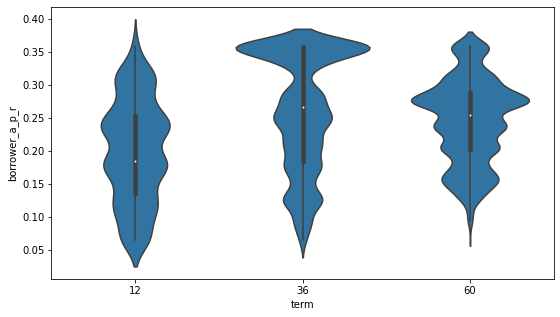

In [39]:
# violin plot / faceted histogram plot of APR distribution for different terms
base_color = sns.color_palette()[0]

plt.figure(figsize=[9,5])
sns.violinplot(data=df_red, x='term', y='borrower_a_p_r', color=base_color);

**Observations:**
* The 36 months loans are bimodal with a large peak at the 36% APR mark
* The 12 month loans tend to have the lowest APRs, whcih is contrary to what I would have expected

### Exploration of loan reason

**Question:** I'm still interested in exploring loan reason more:
  - Do loan values change with reason category?
  - Does term change?
  - Does risk rating and APR change?

In [40]:
# create a cut of the data for the top 5 categories which make up 80% of the loan volume
df_top_5 = df_red[ \
    (df_red['listing_category_alpha']=='Debt Consolidation') | \
    (df_red['listing_category_alpha']=='Home Improvement') | \
    (df_red['listing_category_alpha']=='Business') | \
    (df_red['listing_category_alpha']=='Household Expenses') | \
    (df_red['listing_category_alpha']=='Other') \
]
# confirm this worked
df_top_5['listing_category_alpha'].value_counts()


Debt Consolidation    9352
Home Improvement      2152
Other                 1811
Business              1686
Household Expenses    1123
Name: listing_category_alpha, dtype: int64

In [58]:
# redo listing category order
lc_order = df_top_5['listing_category_alpha'].value_counts().index
# Move 'Other' to the end - it is likely a mixture of miscellaneous categories 
lc_order = lc_order.drop('Other').union(['Other'], sort=False)
lc_order = list(lc_order.values)

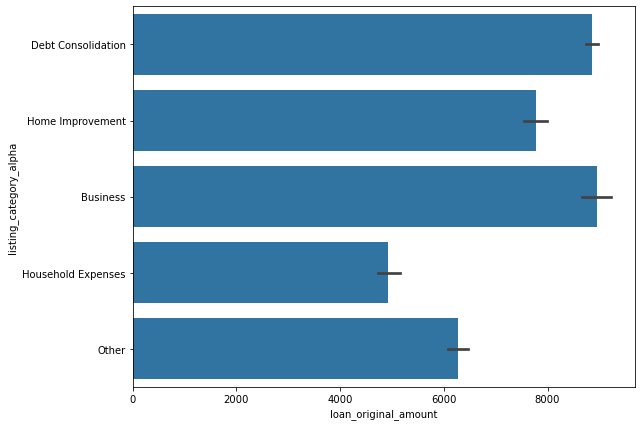

In [60]:
plt.figure(figsize=[9,7])
sns.barplot(data=df_top_5, y='listing_category_alpha', x='loan_original_amount', color=base_color, order=lc_order);

In [61]:

# violin plot / faceted histogram plot of Loan value for different terms
base_color = sns.color_palette()[0]

plt.figure(figsize=[9,5])
sns.violinplot(data=df_top_5, y='listing_category_alpha', x='loan_original_amount', color=base_color, order=lc_order);

**Observation:**
* Mean values range from $4k to $8k
* In the violin plot - the top 3 categories 9by volume) have larger ranges and (typically) higher medians than the other categories
* Again, it may be more interesting to cut out the <$5k and >$5K loans and see how the categories vary

In [62]:
plt.figure(figsize=[9,7])
sns.barplot(data=df_top_5, y='listing_category_alpha', x='borrower_a_p_r', color=base_color, order=lc_order);

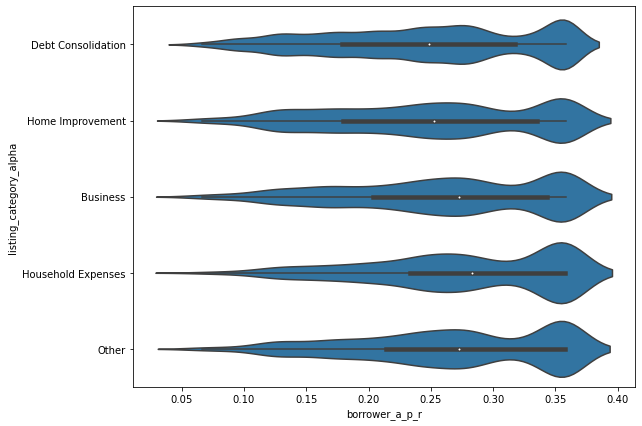

In [63]:
plt.figure(figsize=[9,7])
sns.violinplot(data=df_top_5, y='listing_category_alpha', x='borrower_a_p_r', color=base_color, order=lc_order);

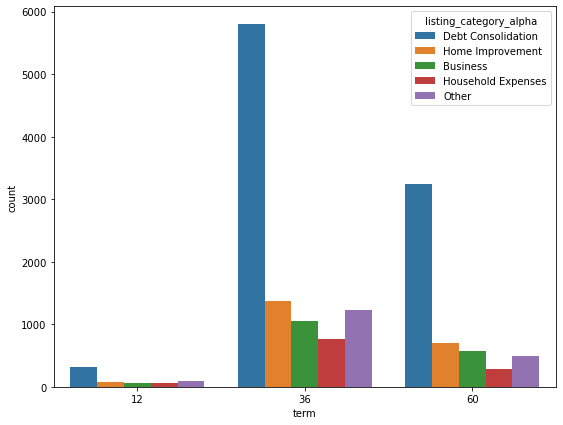

In [64]:
plt.figure(figsize=[9,7])
sns.countplot(data=df_top_5, hue='listing_category_alpha', x='term', hue_order=lc_order);

**Observations:** This is not particularly useful, try again as a stacked 100% bar

In [66]:
# Firstly prepare the dataframe by creating a crosstab with the two categorical variables
ct_top_5 = pd.crosstab(index=df_top_5['listing_category_alpha'], columns=df_top_5['prosper_rating_alpha'], normalize='index')
#reorder coluns
ct_top_5 = ct_top_5.loc[:, rr_order]
#reorder rows
ct_top_5 = ct_top_5.loc[lc_order, :]
ct_top_5

prosper_rating_alpha          AA         A         B         C         D  \
listing_category_alpha                                                     
Debt Consolidation      0.079555  0.136976  0.173973  0.190547  0.166488   
Home Improvement        0.041822  0.181227  0.138941  0.203996  0.163569   
Business                0.041518  0.135231  0.126335  0.199881  0.188612   
Household Expenses      0.017809  0.090828  0.129118  0.202137  0.171861   
Other                   0.023192  0.125345  0.124793  0.221977  0.167311   

prosper_rating_alpha           E        HR  
listing_category_alpha                      
Debt Consolidation      0.092921  0.159538  
Home Improvement        0.087825  0.182621  
Business                0.086595  0.221827  
Household Expenses      0.121104  0.267142  
Other                   0.102154  0.235229

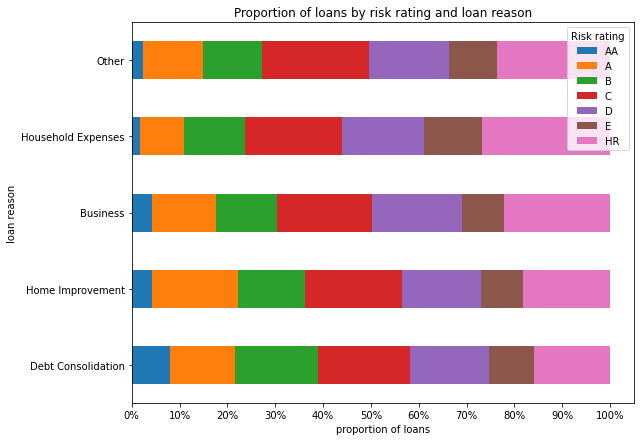

In [67]:
# use pandas plot function to plot a stacked bar 
ct_top_5.plot(kind='barh', stacked=True, figsize=[9,7]);

#set up xticks
x_tick_props = np.arange(0,1.1,0.1)
x_tick_names = ['{:0.0f}%'.format(v * 100) for v in x_tick_props]

#chart and axis labelling
plt.legend(title='Risk rating');
plt.xlabel('proportion of loans');
plt.ylabel('loan reason');
plt.title('Proportion of loans by risk rating and loan reason');
ax = plt.gca();
ax.set_xticks(x_tick_props, labels=x_tick_names);


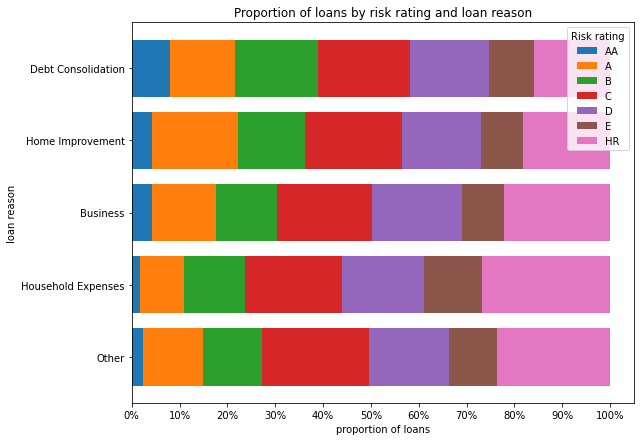

In [68]:

# plot the same but using matplotlib to plot each series one after the other

# set up y-coords
y_coords = np.arange(1, len(ct_top_5)+1, 1)
y_coords

# set up coordinates for the base of each set of bars
lefts = np.zeros(5)

plt.figure(figsize=[9,7])

#plot each successive series, one on top of the other
for col in ct_top_5:
    plt.barh(y=y_coords, width=list(reversed(ct_top_5[col].values)), left=lefts, label=col);
    lefts = lefts  + list(reversed(ct_top_5[col].values));


#set up xticks
x_tick_props = np.arange(0,1.1,0.1)
x_tick_names = ['{:0.0f}%'.format(v * 100) for v in x_tick_props]

#chart and axis labelling
plt.legend(title='Risk rating');
plt.xlabel('proportion of loans');
plt.ylabel('loan reason');
plt.title('Proportion of loans by risk rating and loan reason');
plt.yticks(ticks = y_coords, labels=reversed(ct_top_5.index));
ax = plt.gca();
ax.set_xticks(x_tick_props, labels=x_tick_names);


**Observations:** 
* Debt Consolidation and Home Improvement have better risk ratings vs. Business and Household expenses
* This corresponds to the increasing APR and decreasing loan amounts in the latter two categories vs. the first two

### Summary of bivariate exploration

**Investigation of rate**

* There is a high concentration of loans with values of ~$4k and rates of ~36%, the highest rate
* The remainder of loans are more evenly distributed, typically with values from $5-15k, and rates from 15%-30%
* As the loan becomes riskier (i.e. moving from cateogry 'AA' to 'HR') two things happen
    1. The median rate increases from ~10% to ~36%
    2. Median loan value decreases, with appearent caps of $15k and $4k kicking in at risk categories 'D' and 'HR' respectively
* The higher rate loans are more common with a term of 36mo than the 60mo

**Investigation of loan reason**

* 3 categories, debt consolidation (DC), home improvements (HI) and business (B) have higher median loan sizes than the other two, other (O) and household expenses (HE)
* This appears to be because the DC, HI and B categories have a higher proportion of loans at the $15k level (presumably because the loans in these categories are lower risk)
* DC, HI and B have lower median borrower rates (presumably for similar reasons)
* DC, HI and B also have higher proporions of loans with better risk ratings compared to the other two categories

## Multivariate exploration

**Questions to investigate with multivariate exloration**

* There are two questions I'd like to look at to tie the analysis together:
  1. What is the relationship between loan size, APR and risk rating.  From the above, we'd expect to see the cluster of small, high-APR loans are all high risk ('HR') and so on
  2. What is the relationship between loan reason, risk rating, and loan size?  Based on the bivariate exploration, we'd expect to see the categories with higher median loan value have a higher proportion of low-risk loans

In [50]:
df_red.head()

listing_key          listing_creation_date  \
3   0EF5356002482715299901A  2012-10-22 11:02:35.010000000   
10  0F123545674891886D9F106  2012-05-10 07:04:01.577000000   
15  0F483544120452347F48121  2012-04-10 09:14:46.297000000   
30  0F57353904771934596FE9F  2012-01-30 17:59:17.200000000   
31  0F683558129866945165D36  2012-09-21 13:37:43.210000000   

   loan_origination_date  loan_original_amount  monthly_loan_payment  \
3    2012-11-01 00:00:00                 10000                321.45   
10   2012-05-17 00:00:00                 13500                395.37   
15   2012-04-19 00:00:00                  4000                173.71   
30   2012-02-07 00:00:00                 10000                322.62   
31   2012-09-27 00:00:00                  2000                 86.85   

    percent_funded  term  borrower_a_p_r prosper_rating_alpha  \
3              1.0    36         0.12528                    A   
10             1.0    60         0.27462                    C   
15             1.0    36         0.35797                   HR   
30             1.0    36         0.12782                    A   
31             1.0    36         0.35797                   HR   

    listing_category_numeric listing_category_alpha  
3                         16             Motorcycle  
10                         1     Debt Consolidation  
15                        13     Household Expenses  
30                        20          Wedding Loans  
31                         2       Home Improvement

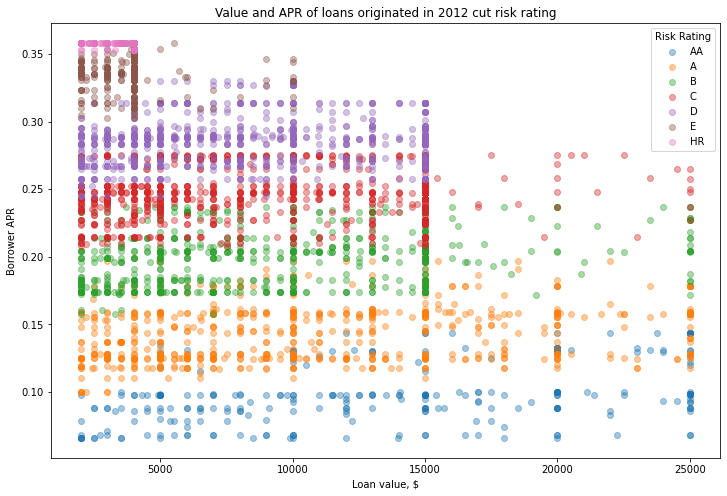

In [116]:
# take a sample of ~25% of the loans
df_sample = df_red.sample(5000)

# scatter plot of APR and loan size
plt.figure(figsize=[12,8])
for risk_rating in rr_order:
    plt.scatter(x=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['loan_original_amount'], y=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['borrower_a_p_r'], alpha=0.4, label=risk_rating);
    #sns.scatterplot(x=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['loan_original_amount'], y=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['borrower_a_p_r'], alpha=0.3, label=risk_rating, x_jitter=10);
    #sns.regplot(x=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['loan_original_amount'], y=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['borrower_a_p_r'], label=risk_rating, x_jitter=100, y_jitter=0.005, fit_reg=False);


plt.xlabel('Loan value, $');
plt.ylabel('Borrower APR');
plt.legend(title='Risk Rating');
plt.title('Value and APR of loans originated in 2012 cut risk rating');

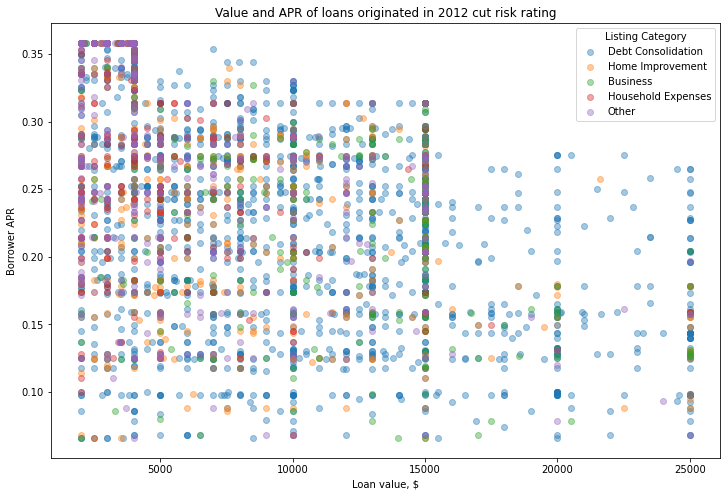

In [133]:
# take a sample of ~25% of the loans
df_sample = df_red.sample(5000)

# scatter plot of APR and loan size
plt.figure(figsize=[12,8])
for listing_cat in lc_order:
    plt.scatter(x=df_sample[df_sample['listing_category_alpha']==listing_cat]['loan_original_amount'], y=df_sample[df_sample['listing_category_alpha']==listing_cat]['borrower_a_p_r'], alpha=0.4, label=listing_cat);
    #sns.scatterplot(x=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['loan_original_amount'], y=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['borrower_a_p_r'], alpha=0.3, label=risk_rating, x_jitter=10);
    #sns.regplot(x=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['loan_original_amount'], y=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['borrower_a_p_r'], label=risk_rating, x_jitter=100, y_jitter=0.005, fit_reg=False);


plt.xlabel('Loan value, $');
plt.ylabel('Borrower APR');
plt.legend(title='Listing Category');
plt.title('Value and APR of loans originated in 2012 cut risk rating');

In [128]:
g = sns.FacetGrid(data=df_top_5, row='prosper_rating_alpha', col='listing_category_alpha', col_order=lc_order, row_order=rr_order, margin_titles=True);
g.map(plt.hist, 'loan_original_amount');
g.set_titles(row_template = 'Rating: {row_name}', col_template = '{col_name}')


In [132]:
g = sns.FacetGrid(data=df_top_5, col='prosper_rating_alpha', row='listing_category_alpha', row_order=lc_order, col_order=rr_order, margin_titles=True);
g.map(plt.hist, 'loan_original_amount');
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');


This is the correct grid, but I think we need a simpler plot e.g. ave loan amount?  I'm unclear on what question we're trying to answer here... 

In [146]:
# create a crosstab for the heatmap
ct = pd.crosstab(index=df_top_5['listing_category_alpha'], columns=df_top_5['prosper_rating_alpha'], aggfunc='mean', values=df_top_5['loan_original_amount'])
# ct = pd.crosstab(index=df_top_5['listing_category_alpha'], columns=df_top_5['prosper_rating_alpha'])
#reorder coluns
ct = ct.loc[:, rr_order]
#reorder rows
ct = ct.loc[lc_order, :]

ct

prosper_rating_alpha              AA             A             B            C  \
listing_category_alpha                                                          
Debt Consolidation      13358.502688  12213.383294  10543.983405  9916.047699   
Home Improvement        12468.166667  10829.284615   8575.304348  8639.207289   
Business                16577.600000  13724.438596  11136.525822  9855.584570   
Household Expenses      12850.000000   7088.558824   5593.103448  5589.180617   
Other                   11713.095238   9786.176211   7080.823009  7233.223881   

prosper_rating_alpha              D            E           HR  
listing_category_alpha                                         
Debt Consolidation      8682.116249  3951.700806  3635.083110  
Home Improvement        8335.190341  3740.671958  3541.661578  
Business                9864.902516  3923.883562  3774.451872  
Household Expenses      5414.575130  3335.477941  3271.783333  
Other                   6830.587459  3478.648649  3348.007042

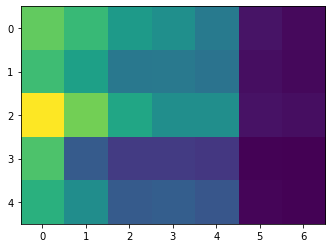

In [147]:
plt.imshow(X=ct, )